> Code to accompany **Chapter 4: DNN Processing for Image, Audio and Video**

# Using the ResNet50 Model for Image Classification

This notebook illustrates how to perform image classification using ResNet50. The same code will be used to classify images when we work with adversarial examples.

## Import the pre-trained ResNet50 Model

The following code gets the pre-trained ImageNet model. By specifying 'include_top=True', we also get the final classification layers of the model.

Our image data will be manipulated as a multi-dimensional array using the NumPy package.

In [1]:
# Import the model
import tensorflow as tf
from tensorflow import keras
from keras.applications.resnet50 import ResNet50

# NumPy for manipulating images as multi-dimensional arrays
import numpy as np
# PyPlot for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Access helper function
import sys
sys.path.append('..')
from strengtheningdnns.image_utils import image_from_file

# Get the ResNet50 network using the imagenet trained weights
model = ResNet50(weights='imagenet', include_top=True)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Take a look at the ResNet50 layers.
By scrolling to the bottom of this output, you can see how many parameters (trainable and non-trainable) make up this network.

In [2]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

## Select our image

There are several images in the image folder to try. Or, of course, you can try experiment with your own images.

In [1]:
import matplotlib.pyplot as plt

# Import helper function
import sys
sys.path.append('..')
from strengtheningdnns.image_utils import image_from_file

(?, ?, ?)
Re-scaling image to  [224, 224]


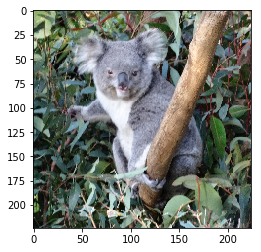

In [6]:
image_path = '../images/koala.jpg'
image = image_from_file(image_path, [224,224])
plt.imshow(image/255)

## Perform the relevant pre-processing 

We need to pre-process images before they are passed to the classifier. 

If you are interested in understanding this pre-processing step in greater detail, take a look at
[the ResNet50Preprocessing.ipynb file on Github](https://github.com/katywarr/strengthening-dnns/blob/master/chapter04/resnet50_preprocessing.ipynb) or, if you are running the notebooks, [run the ResNet50Preprocessing.ipynb notebook](../chapter04/resnet50_preprocessing.ipynb).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


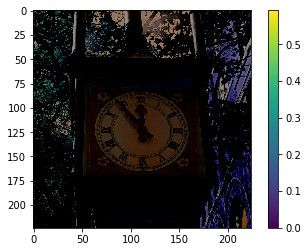

In [11]:
from keras.applications.resnet50 import preprocess_input

image_for_resnet = preprocess_input(image)

plt.imshow(image_for_resnet/255)
plt.colorbar()

## Pass the image through the classifier and present the predictions

ResNet50 takes a batch of images as input. expand_dims inserts a new axis into the numpy array representing the image so it becomes one of a list (containing only one image).

We then get the model to make its predictions and print them out.

In [12]:
image_for_resnet_list = np.expand_dims(image_for_resnet, 0)

predictions = model.predict(image_for_resnet_list)
print(predictions)

[[2.06012860e-10 1.55862490e-09 1.07234843e-09 6.65044297e-10
  7.64556266e-11 4.96643456e-11 1.19452351e-10 3.32982142e-10
  3.16557980e-09 1.73533921e-09 1.04178364e-08 9.13896292e-10
  1.58102793e-08 2.04484436e-07 9.68112843e-08 1.06054479e-07
  5.00500752e-10 6.28375361e-08 1.94160933e-07 2.77207533e-07
  1.21926236e-09 6.93439542e-11 2.46814613e-09 8.14933809e-09
  2.86629742e-08 9.97294816e-11 2.77010637e-11 1.42997655e-10
  2.93993475e-11 9.98690575e-10 2.68697065e-10 3.87908039e-10
  7.20274118e-11 2.51253063e-11 1.99699927e-11 2.90030250e-10
  7.32911842e-10 3.36244699e-10 4.17886420e-11 5.51747448e-09
  7.45678519e-10 6.20894933e-11 2.99146652e-10 5.43235856e-09
  1.21198607e-10 3.49140689e-10 9.79533010e-10 2.93236435e-10
  2.14720991e-10 8.05585154e-10 1.18526655e-09 1.81610316e-09
  1.41891332e-10 4.47902965e-10 1.02006570e-09 1.88655050e-10
  7.88573096e-11 6.27208147e-11 3.14792442e-10 3.89663274e-10
  9.22081800e-10 2.90326929e-10 2.93700481e-10 8.30142760e-11
  6.2373

There's one probability (prediction) for each of the thousand classifications.

Keras provides a handy method for decoding these predictions and pulling out the top few.

If you are interested, here is a human-readable list of the [ResNet50 labels](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a)

In [13]:
from keras.applications.resnet50 import decode_predictions

decoded_predictions = decode_predictions(predictions, top=3)

predictions_for_image = decoded_predictions[0]
for pred in predictions_for_image:
    print(pred[1],' : ', pred[2])

wall_clock  :  0.48271918
analog_clock  :  0.48174235
barometer  :  0.028711814


Return to the image selection step if you would like to see how ResNet50 does with some other images.